## Importing Libraries:

In [ ]:

import numpy  as np
import pandas as pd
import json

# Corpus Processing
import re
import nltk.corpus
from nltk.tokenize
import word_tokenize
from nltk
import SnowballStemmer
from sklearn.feature_extraction.text
import TfidfVectorizer
from sklearn.preprocessing
import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics
import silhouette_samples, silhouette_score
from unidecode import unidecode

In [ ]:
#pip install Unidecode

     -------------------------------------- 235.5/235.5 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 21.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#PART1
#data-preprocessing

data = pd.read_csv("National anthems.csv") #, encoding='utf-8')
data.columns = map(str.lower, data.columns)

#continents = ['Europe', 'South_America', 'North_America']
#data = data.loc[data['continent'].isin(continents)]
data.head(6)

,country,alpha-2,alpha-3,continent,anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."
5,Belgium,BE,BEL,Europe,"O dear Belgium, O holy land of the fathers Ã¢â..."


In [ ]:
data.shape

(190, 5)

In [ ]:
corpus = data['anthem'].tolist()
corpus[18][0:447]

"O Lord, bless the nation of Hungary With your grace and bounty Extend over it your guarding arm During strife with its enemies Long torn by ill fate Bring upon it a time of relief This nation has suffered for all sins Of the past and of the future! You brought our ancestors up Over the Carpathians' holy peaks By You was won a beautiful homeland For Bendeguz's sons And wherever flow the rivers of The Tisza and the Danube ÃƒÂ\x81rpÃƒÂ¡d our hero's "

In [ ]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [ ]:
def processCorpus(corpus, language):
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    #countries_list = [line.rstrip('\n') for line in open('lists/countries.txt')] # Load .txt file line by line
    #nationalities_list = [line.rstrip('\n') for line in open('lists/nationalities.txt')] # Load .txt file line by line
    #other_words = [line.rstrip('\n') for line in open('lists/stopwords_scrapmaker.txt')] # Load .txt file line by line

    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase

        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        #listOfTokens = removeWords(listOfTokens, countries_list)
        #listOfTokens = removeWords(listOfTokens, nationalities_list)
        #listOfTokens = removeWords(listOfTokens, other_words)

        listOfTokens = applyStemming(listOfTokens, param_stemmer)
        #listOfTokens = removeWords(listOfTokens, other_words)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index]) # getting rid of accents in certain countries national anthems

    return corpus

In [ ]:
language = 'english'
corpus = processCorpus(corpus, language)
corpus[18][0:460]

'lord bless nation hungari grace bounti extend guard arm strife enemi long torn ill fate bring upon time relief nation suffer sin past futur brought ancestor carpathian holi peak beauti homeland bendeguz son wherev flow river tisza danub afarpafa!d hero descend root bloom plain kun ripen wheat grape field tokaj drip sweet nectar flag often plant wild turk earthwork mafa!tyafa! grave armi whimper vienna proud fort sin anger gather bosom struck lightn thunder'

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

190 rows


C:\Users\JITHIN\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
albania,0.305070,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
sacr,0.276738,0.000000,0.000000,0.000000,0.089276,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
fatherland,0.224386,0.110326,0.068473,0.142458,0.000000,0.081009,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
proclaim,0.216748,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104170
upon,0.194497,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093476


In [ ]:
final_df.shape

(190, 2822)

In [ ]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
albania,0.305070,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
sacr,0.276738,0.000000,0.000000,0.000000,0.089276,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
fatherland,0.224386,0.110326,0.068473,0.142458,0.000000,0.081009,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
proclaim,0.216748,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104170
upon,0.194497,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093476


In [ ]:
inp = final_df.to_numpy()
type(inp)

numpy.ndarray

In [ ]:
#PART2
# k-means clustering

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 7)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(inp)
    kmeanModel.fit(inp)

    distortions.append(sum(np.min(cdist(inp, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / inp.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(inp, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / inp.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\JITHIN\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JITHIN\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 : 0.9751028171420189
2 : 0.9690131403062856
3 : 0.9645491114041969
4 : 0.9599720473622662
5 : 0.9554250834957749
6 : 0.9521018802684502


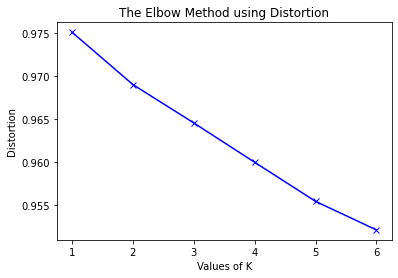

In [ ]:
# Tabulating and Visualizing the Results
# a) Using the different values of Distortion: (this is not needed, elbow for inertia is enough)
for key, val in mapping1.items():
    print(f'{key} : {val}')


plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

1 : 180.69187270958923
2 : 178.4693805034108
3 : 176.86066569246918
4 : 175.2193730358879
5 : 173.59654027225005
6 : 172.46454029471903


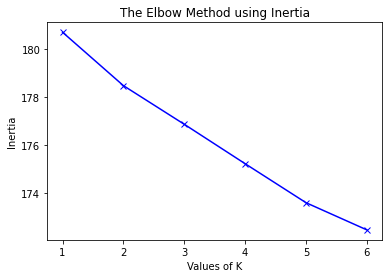

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## K-Means

##### Function that runs the K-Means algorithm with k=3 ###

In [ ]:
from sklearn import metrics

'''
k_means_25 = KMeans(n_clusters=25)
model = k_means_25.fit(inp)
y_hat_25 = k_means_25.predict(inp)
labels_25 = k_means_25.labels_
'''


kmeanModel = KMeans(n_clusters=3).fit(inp)
kmeanModel.fit(inp)
print(kmeanModel.inertia_)

176.28419718281384


In [ ]:
# Desired output of PART2
d = data
d['label'] = kmeanModel.labels_
d.head()



,country,alpha-2,alpha-3,continent,anthem,label
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",0
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",0
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",2
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",1
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",0


range(1, 3)


In [ ]:
#PART3
# intra-cluster distances

from sklearn.metrics.pairwise import pairwise_distances

cl = kmeanModel.labels_
intra = pairwise_distances(inp)

for k in range(3):
    dist = intra[cl == k][:,cl==k]
    dist = dist[dist!=0].mean()
    print("Intra cluster distances for cluster ", k, "= ", dist)

Intra cluster distances for cluster  0 =  1.3808725554654875
Intra cluster distances for cluster  1 =  1.325883601925411
Intra cluster distances for cluster  2 =  1.3792082162925008


In [ ]:
#USE IF NEEDED
# Assuming inp is your data and kmeanModel.labels_ contains cluster labels
#silhouette_avg = silhouette_score(inp, kmeanModel.labels_)
#print("Silhouette Score:", silhouette_avg)